In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [4]:
steps=pd.read_csv("steps.csv", sep=';')
steps["mean"] = steps.iloc[:,:].mean(axis=1)
steps.head(15)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10144.048193
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5652.756098
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8246.033557
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3460.380952
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5215.636364
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11831.220779
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4631.321429
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3533.271186
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7899.0,11731.0,14151.0,NaN,3996.0,2556.0,302.0,2442.0,NaN,8551.114035
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3629.666667


In [5]:
survey=pd.read_csv("survey.csv")
survey.info()
survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           929 non-null    int64  
 1   city         929 non-null    object 
 2   gender       929 non-null    object 
 3   age          929 non-null    object 
 4   hh_size      929 non-null    int64  
 5   education    929 non-null    int64  
 6   education_1  929 non-null    object 
 7   height       928 non-null    float64
 8   weight       927 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 65.4+ KB


,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [6]:
df1 = pd.merge(steps, survey, on='id')
df1.head(15)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,mean,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,10144.048193,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,5652.756098,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,8246.033557,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3460.380952,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5215.636364,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,NaN,11831.220779,Lille,Male,35-44,1,1,Vocational,170.0,63.0
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4631.321429,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3533.271186,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8551.114035,Lille,Female,35-44,4,4,Vocational,172.0,69.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,NaN,3629.666667,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0


Body Mass Index is een betere maatstaf voor een gezonder lichaam aangezien dit een vergelijking maakt tussen lengte en gewicht. De formule luidt: (aantal kilo's/lengte in m^2)

In [7]:
df1['height_div']= df1['height']/100
df1['height_two']= df1['height_div']*df1['height_div']
df1['bmi']= df1['weight']/df1['height_two']
df1.head(15)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,gender,age,hh_size,education,education_1,height,weight,height_div,height_two,bmi
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Male,25-34,4,4,Master or doctorate,178.0,98.0,1.78,3.1684,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Male,35-44,1,3,Bachelor,180.0,77.0,1.80,3.2400,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Male,25-34,2,2,Master or doctorate,180.0,83.0,1.80,3.2400,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,<25,1,1,Bachelor,178.0,80.0,1.78,3.1684,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Bachelor,167.0,61.0,1.67,2.7889,21.872423
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Male,35-44,1,1,Vocational,170.0,63.0,1.70,2.8900,21.799308
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,25-34,2,2,Master or doctorate,175.0,75.0,1.75,3.0625,24.489796
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Master or doctorate,165.0,88.0,1.65,2.7225,32.323232
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,35-44,4,4,Vocational,172.0,69.0,1.72,2.9584,23.323418
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,Female,25-34,2,2,Master or doctorate,165.0,93.0,1.65,2.7225,34.159780


In [8]:
df1.dtypes

id              int64
20-6-2013     float64
21-6-2013     float64
22-6-2013     float64
23-6-2013     float64
               ...   
height        float64
weight        float64
height_div    float64
height_two    float64
bmi           float64
Length: 341, dtype: object

In [9]:
dataframe=df1[['id','height_div','weight','bmi','mean','age','gender']]
dataframe.head(15)

,id,height_div,weight,bmi,mean,age,gender
0,1,1.78,98.0,30.930438,10144.048193,25-34,Male
1,2,1.80,77.0,23.765432,5652.756098,35-44,Male
2,3,1.80,83.0,25.617284,8246.033557,25-34,Male
3,4,1.78,80.0,25.249337,3460.380952,<25,Male
4,5,1.67,61.0,21.872423,5215.636364,25-34,Female
5,6,1.70,63.0,21.799308,11831.220779,35-44,Male
6,7,1.75,75.0,24.489796,4631.321429,25-34,Male
7,8,1.65,88.0,32.323232,3533.271186,25-34,Female
8,9,1.72,69.0,23.323418,8551.114035,35-44,Female
9,10,1.65,93.0,34.159780,3629.666667,25-34,Female


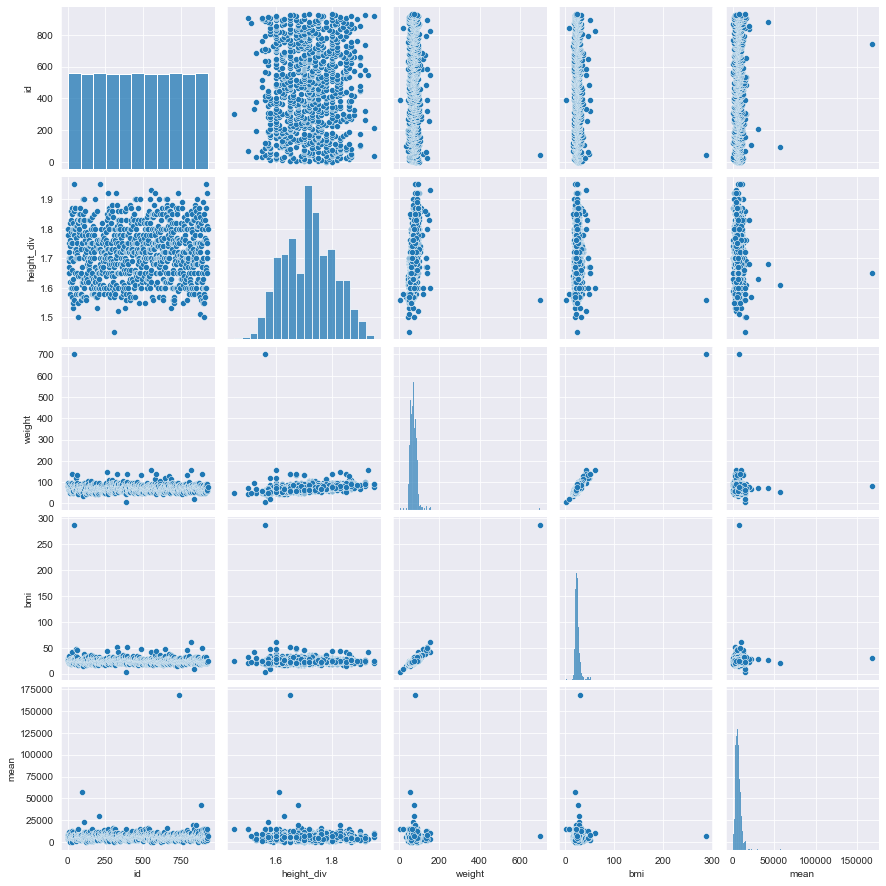

In [10]:
sns.set_style('darkgrid')

sns.pairplot(dataframe)

In [19]:
dataframe.corr()

,id,height_div,weight,bmi,mean
id,1.000000,0.028926,-0.035308,-0.047576,0.040848
height_div,0.028926,1.000000,0.265138,-0.032015,-0.071733
weight,-0.035308,0.265138,1.000000,0.951323,-0.020668
bmi,-0.047576,-0.032015,0.951323,1.000000,0.001398
mean,0.040848,-0.071733,-0.020668,0.001398,1.000000


In [21]:
DataFrame= df1[['id','height_div','weight','bmi','mean','age','gender','education_1','city']]
DataFrame.head(15)

,id,height_div,weight,bmi,mean,age,gender,education_1,city
0,1,1.78,98.0,30.930438,10144.048193,25-34,Male,Master or doctorate,Bordeaux
1,2,1.80,77.0,23.765432,5652.756098,35-44,Male,Bachelor,Lille
2,3,1.80,83.0,25.617284,8246.033557,25-34,Male,Master or doctorate,Montpellier
3,4,1.78,80.0,25.249337,3460.380952,<25,Male,Bachelor,Lyon
4,5,1.67,61.0,21.872423,5215.636364,25-34,Female,Bachelor,Montpellier
5,6,1.70,63.0,21.799308,11831.220779,35-44,Male,Vocational,Lille
6,7,1.75,75.0,24.489796,4631.321429,25-34,Male,Master or doctorate,Montpellier
7,8,1.65,88.0,32.323232,3533.271186,25-34,Female,Master or doctorate,Bordeaux
8,9,1.72,69.0,23.323418,8551.114035,35-44,Female,Vocational,Lille
9,10,1.65,93.0,34.159780,3629.666667,25-34,Female,Master or doctorate,Lille


In [ ]:
DataFrame.to_csv('DataFrame_week3.csv')